<a href="https://colab.research.google.com/github/IshaqKHATTAK/Computer-Vision/blob/main/watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
img = cv.imread('flower.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU) #to seperate forground and background
    
    # noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
    
    # sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
    
    # Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    
    # Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
    
    # Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
markers = markers+1
    
    # Now, mark the region of unknown with zero
markers[unknown==255] = 0
    
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,255]

plt.imshow(img)

error: ignored

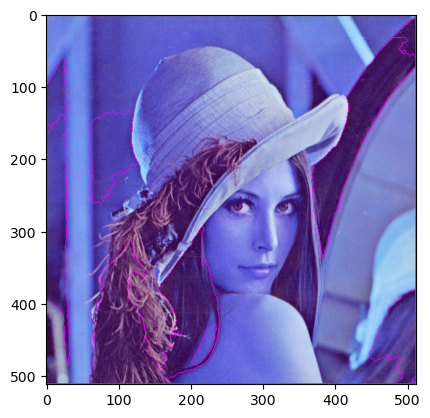

In [ ]:
plt.imshow(watershed(cv.imread('flower.png')))

In [ ]:

import os

folder_path = "calling"  # specify the path to the folder containing images
image_list = []  # list to store the images

# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image using OpenCV
        image = cv.imread(os.path.join(folder_path, filename))

        # Append the image to the list
        image_list.append(image)

# Print the number of images read
print("Total Images: ", len(image_list))


Total Images:  200


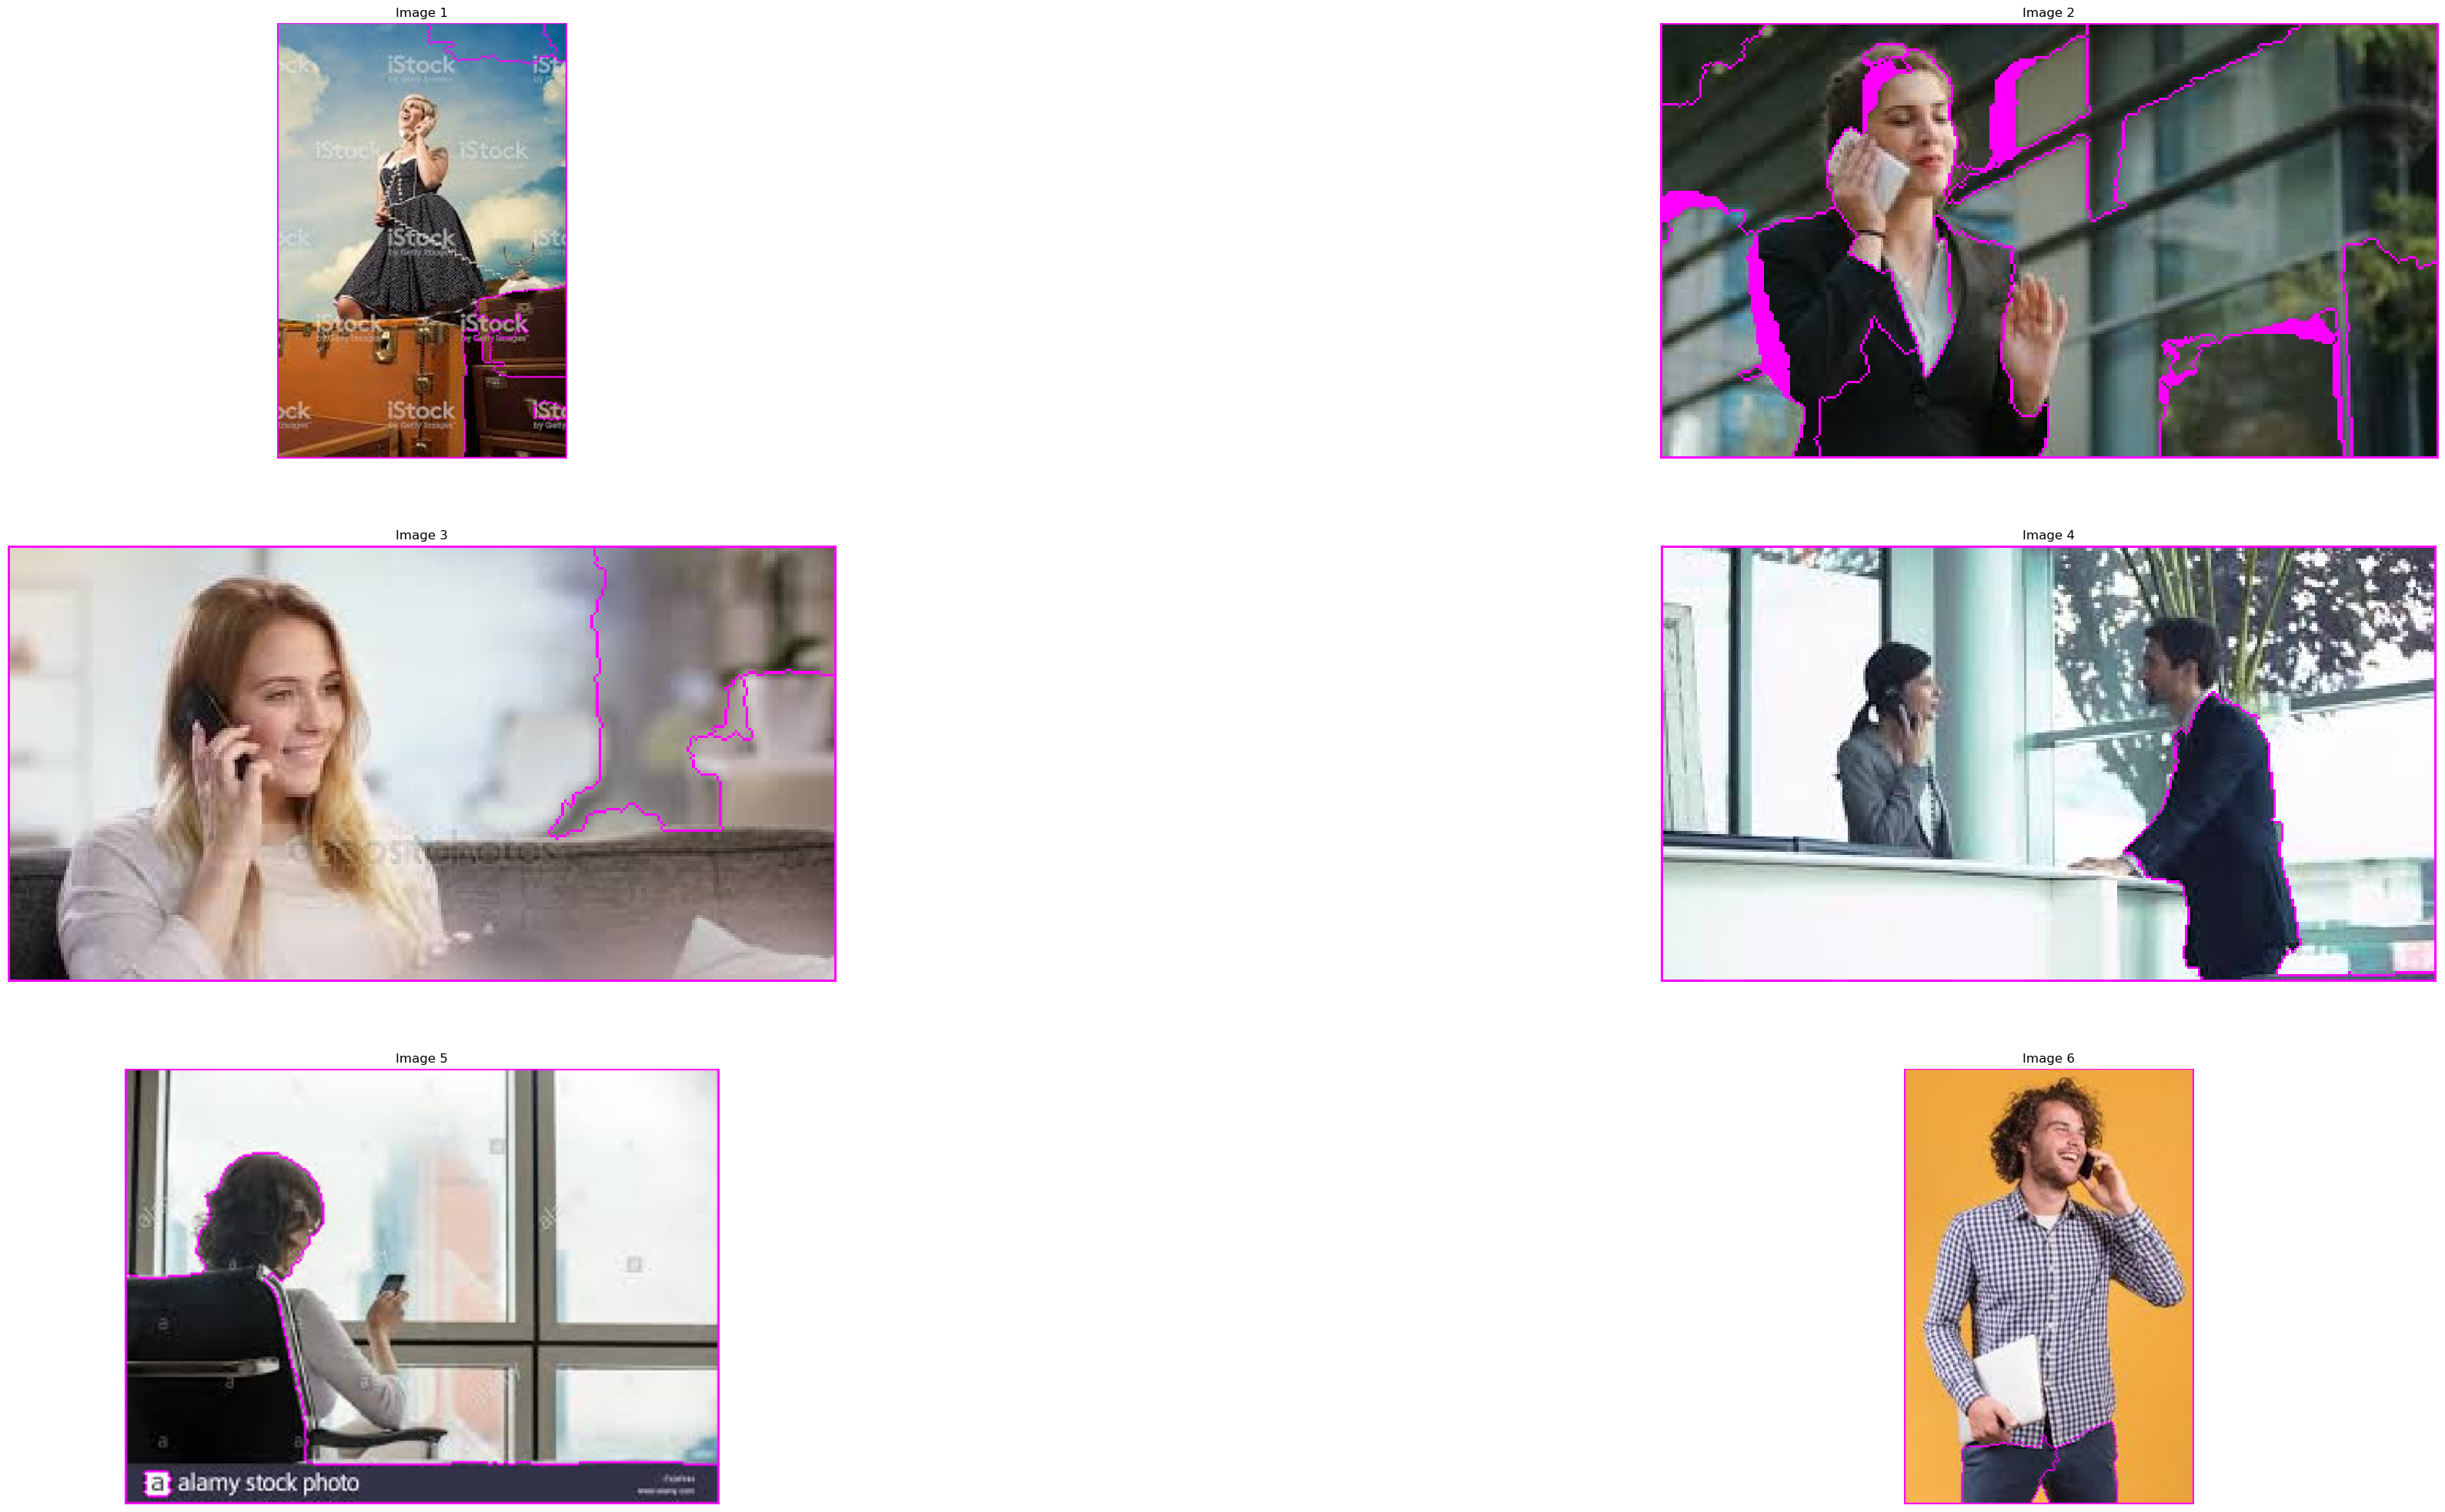

In [ ]:
# Create a 10x20 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(50, 25))

# Display each image in a subplot
for idx, ax in enumerate(axs.ravel()):
    if idx < len(image_list):
        # Convert BGR to RGB for matplotlib display
        image_rgb = cv2.cvtColor(watershed(image_list[idx]), cv2.COLOR_BGR2RGB)

        # Display the image in the subplot
        ax.imshow(image_rgb)
        ax.axis('off')
        ax.set_title(f"Image {idx + 1}")
    else:
        # Hide the subplot if there are no more images to display
        ax.axis('off')

# Show the figure
plt.show()